In [1]:
library(MASS)

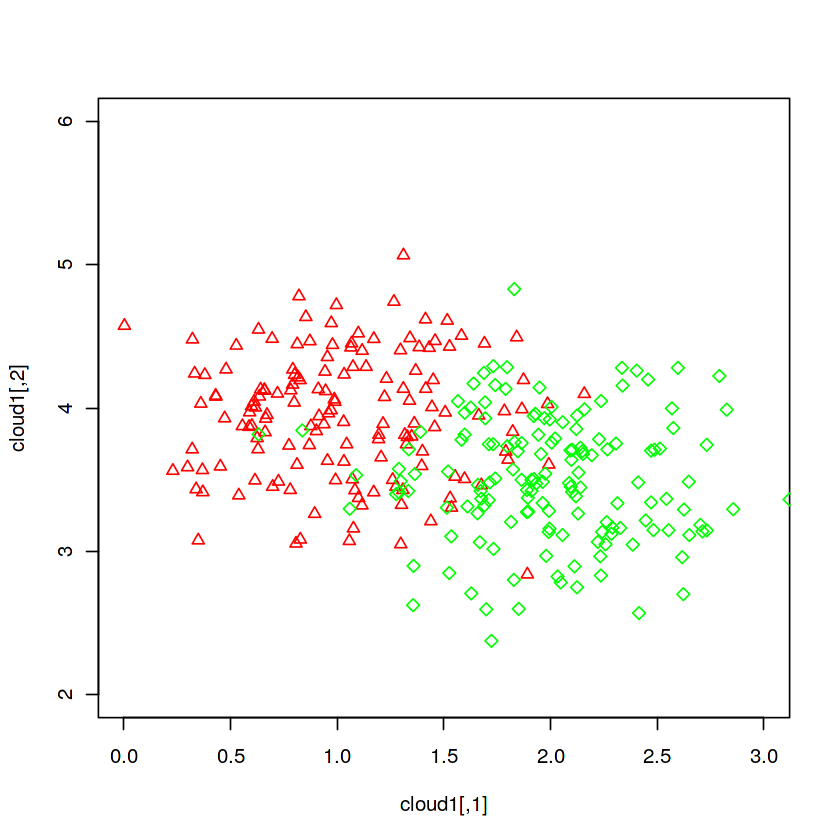

In [93]:
set.seed(999)
ncloud=150
cloud1=mvrnorm(n=ncloud,mu=c(1,4),Sigma=diag(c(.2, .2)))
cloud2=mvrnorm(n=ncloud,mu=c(2,3.5),Sigma=diag(c(.2, .2)))
#pdf("svm-in-R.pdf")
plot(cloud1,xlim=c(0,3),ylim=c(2,6),pch=2,col="red")
points(cloud2,pch=5,col="green")
xy=rbind(cloud1,cloud2)
colnames(xy)=c("x","y")
labels=as.factor(c(rep(1,ncloud),rep(2,ncloud)))
#dev.off()

In [77]:
library(e1071)

In [78]:
nclouds=2*ncloud
ind=sample(1:nclouds,.75*nclouds)
train=xy[ind,]
test=xy[-ind,]
train.labels=labels[ind]

In [79]:
model=svm(train,train.labels)
print(model)


Call:
svm.default(x = train, y = train.labels)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  82



In [80]:
predictions=as.numeric(as.character(predict(model,test)))
predictions

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2
[39] 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

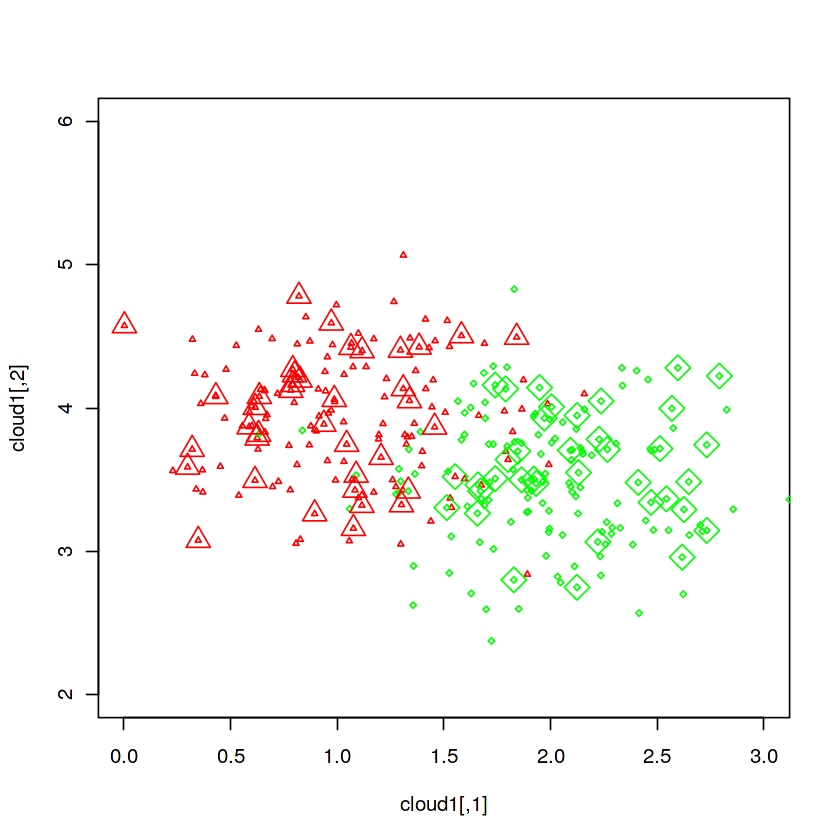

In [90]:
#pdf("svm-in-R-results.pdf")
plot(cloud1,xlim=c(0,3),ylim=c(2,6),pch=2,col="red",cex=.5)
points(cloud2,pch=5,col="green",cex=.5)
cloud.colors=c("red","green")
cloud.markers=c(2,5)
ntest=nrow(test)
for (j in 1:ntest){
    pj=predictions[j]
    points(test[j,1], test[j,2], 
           col=cloud.colors[pj], 
           pch=cloud.markers[pj], 
           cex=2)
    
}
#dev.off()